In [197]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
import numpy as np
from qiskit import Aer, transpile, assemble
from qiskit.visualization import plot_histogram as plt_hist
from scipy.optimize import minimize, fmin_cobyla
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit import ParameterVector
from matplotlib import pyplot as plt
from qiskit.tools.monitor import job_monitor, backend_overview
from qiskit.providers.ibmq.managed import IBMQJobManager

In [198]:
fmin_cobyla?

In [171]:
%run UsefulFunctions.ipynb
%run PSR_Gradient_Descend.ipynb

In [172]:
def get_exact_E_value(num_qubits,h):
    E_range = get_E_range('measured_data/Exact_E_range(extended).txt', num_qubits)
    return E_range[int(h * 10)]

a = [0.2,0.4,0.6, 0.8, 1.0, 1.2,1.4,1.6,1.8,2.0]
b = []
for ele in a:
    b.append(get_exact_E_value(2, ele))
print(b)

[(-2.039607805437113+0j), (-2.1540659228538015+0j), (-2.3323807579381204+0j), (-2.561249694973139+0j), (-2.82842712474619+0j), (-3.1240998703626617+0j), (-3.440930106817051+0j), (-3.7735924528226406+0j), (-4.1182520563948+0j), (-4.472135954999578+0j)]


In [173]:
with open('belem.txt', 'r') as infile:
    infile.readline()
    E = []
    for line in infile:
        n, h, E_value = line.rstrip().split(' ')
        E_value = float(E_value)
        E.append(E_value)

with open('lima.txt', 'r') as infile:
    infile.readline()
    F = []
    for line in infile:
        n, h, E_value = line.rstrip().split(' ')
        E_value = float(E_value)
        F.append(E_value)
        
with open('bogota.txt', 'r') as infile:
    infile.readline()
    G = []
    for line in infile:
        n, h, E_value = line.rstrip().split(' ')
        E_value = float(E_value)
        G.append(E_value)

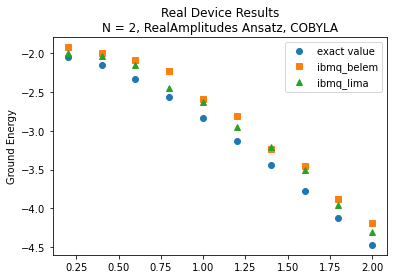

In [182]:
plt.plot(a, b, 'o', label = 'exact value')
plt.plot(a, E, 's', label = 'ibmq_belem')
plt.plot(a, F, '^', label = 'ibmq_lima')
#plt.plot(a, G, '<', label = 'bogota')
plt.legend()
plt.title('Real Device Results\nN = 2, RealAmplitudes Ansatz, COBYLA')
plt.ylabel('Ground Energy')
plt.xlabel('')
plt.show()

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


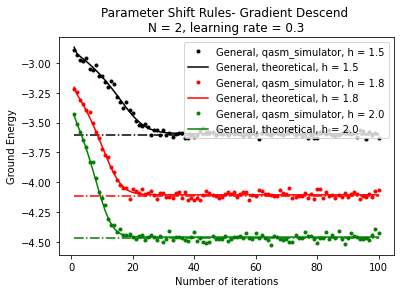

In [269]:
numiters = 100
learning_rate = 0.3
N = 2
h_range = [1.5, 1.8, 2.0]
color = ['k', 'r', 'g'  ]
for i in range(len(h_range)):
    h = h_range[i]
    f0 = PSR_Gradient_Descend(ising_costfun, [0,0,0], (N,h,'General'), learning_rate, numiters)
    F0 = PSR_Gradient_Descend(theor_ising_costfun, [0,0,0], (N,h), learning_rate, numiters)

    plt.plot(np.arange(1, numiters+1), f0.values, '.', label = 'General, qasm_simulator, h = {}'.format(h), color = color[i])

    plt.plot(np.arange(1, numiters+1), F0.values, '-', label = 'General, theoretical, h = {}'.format(h), color = color[i])

    plt.plot(np.arange(1, numiters+1), [get_exact_E_value(N,h)] * numiters, '-.', color = color[i] )

plt.title('Parameter Shift Rules- Gradient Descend \nN = {}, learning rate = {}'.format(N, learning_rate)  )
plt.ylabel('Ground Energy')
plt.xlabel('Number of iterations')
plt.legend()
plt.show()

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


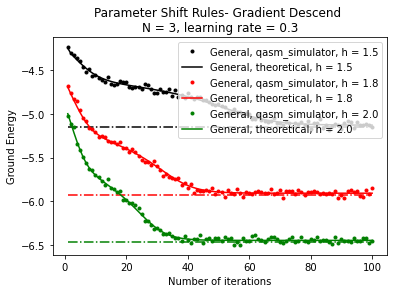

CPU times: user 9min 13s, sys: 2.7 s, total: 9min 16s
Wall time: 9min 16s


In [270]:
%%time
numiters = 100
learning_rate = 0.3
N = 3
h_range = [1.5, 1.8, 2.0]
color = ['k', 'r', 'g'  ]
for i in range(len(h_range)):
    h = h_range[i]
    f0 = PSR_Gradient_Descend(ising_costfun, [0,0,0,0,0,0,0], (N,h,'General'), learning_rate, numiters)
    F0 = PSR_Gradient_Descend(theor_ising_costfun, [0,0,0,0,0,0,0], (N,h), learning_rate, numiters)

    plt.plot(np.arange(1, numiters+1), f0.values, '.', label = 'General, qasm_simulator, h = {}'.format(h), color = color[i])

    plt.plot(np.arange(1, numiters+1), F0.values, '-', label = 'General, theoretical, h = {}'.format(h), color = color[i])

    plt.plot(np.arange(1, numiters+1), [get_exact_E_value(N,h)] * numiters, '-.', color = color[i] )
plt.title('Parameter Shift Rules- Gradient Descend \nN = {}, learning rate = {}'.format(N, learning_rate))
plt.ylabel('Ground Energy')
plt.xlabel('Number of iterations')
plt.legend()
plt.show()

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


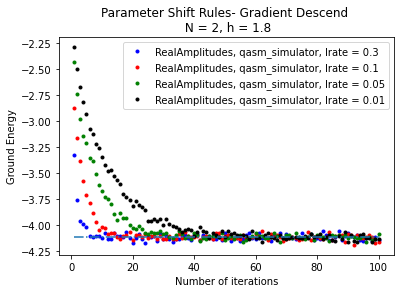

In [278]:
numiters = 100
#learning_rate = 0.1
N = 2
h = 1.8

f0 = PSR_Gradient_Descend(ising_costfun, [0,0,0,0], (N,h,'RealAmp_full'), 0.3, numiters)
f1 = PSR_Gradient_Descend(ising_costfun, [0,0,0,0], (N,h,'RealAmp_full'), 0.1, numiters)
f2 = PSR_Gradient_Descend(ising_costfun, [0,0,0,0], (N,h,'RealAmp_full'), 0.05, numiters)
f3 =PSR_Gradient_Descend(ising_costfun, [0,0,0,0], (N,h,'RealAmp_full'), 0.03, numiters)
#F1 = PSR_Gradient_Descend(theor_ising_costfun, [0,0,0,0], (N, h), learning_rate, numiters)


plt.plot(np.arange(1, numiters+1), f0.values, '.', label = 'RealAmplitudes, qasm_simulator, lrate = 0.3', color = 'b')
plt.plot(np.arange(1, numiters+1), f1.values, '.', label = 'RealAmplitudes, qasm_simulator, lrate = 0.1', color = 'r')
plt.plot(np.arange(1, numiters+1), f2.values, '.', label = 'RealAmplitudes, qasm_simulator, lrate = 0.05', color = 'g')
plt.plot(np.arange(1, numiters+1), f3.values, '.', label = 'RealAmplitudes, qasm_simulator, lrate = 0.01', color = 'k')
plt.plot(np.arange(1, numiters+1), [get_exact_E_value(N,h)] * numiters, '-.' )


plt.title('Parameter Shift Rules- Gradient Descend \n N = {}, h = {}'.format(N, h)  )
plt.ylabel('Ground Energy')
plt.xlabel('Number of iterations')
plt.legend()
plt.show()

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


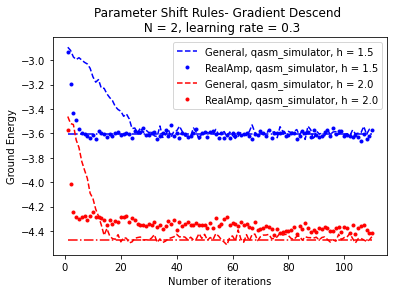

CPU times: user 3min 3s, sys: 1.47 s, total: 3min 5s
Wall time: 3min 5s


In [286]:
%%time
numiters = 110
learning_rate = 0.3

N = 2
h_range = [1.5, 2.0]
color = ['b', 'r']
for i in range(len(h_range)):
    h = h_range[i]
    f1 = PSR_Gradient_Descend(ising_costfun, [0,0,0], (N,h,'General'), learning_rate, numiters)
    f2 = PSR_Gradient_Descend(ising_costfun, [0,0,0,0], (N,h,'RealAmp_full'), learning_rate, numiters)

    plt.plot(np.arange(1, numiters+1), f1.values, '--', label = 'General, qasm_simulator, h = {}'.format(h), color = color[i])
    plt.plot(np.arange(1, numiters+1), f2.values, '.', label = 'RealAmp, qasm_simulator, h = {}'.format(h), color = color[i])
    plt.plot(np.arange(1, numiters+1), [get_exact_E_value(N,h)] * numiters, '-.', color = color[i] )
plt.title('Parameter Shift Rules- Gradient Descend \n N = {}, learning rate = {}'.format(N,learning_rate)  )
plt.ylabel('Ground Energy')
plt.xlabel('Number of iterations')
plt.legend()
plt.show()

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


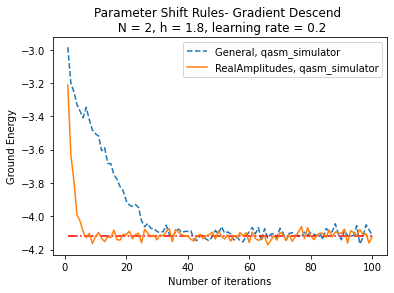

In [293]:
numiters = 100
learning_rate = 0.2
N = 2
h = 1.8

f1 = PSR_Gradient_Descend(ising_costfun, [0,0,0,0], (N,h,'RealAmp_full'), learning_rate, numiters)
f2 = PSR_Gradient_Descend(ising_costfun, [0,0,0], (N,h, 'General'), learning_rate, numiters)

plt.plot(np.arange(1, numiters+1), f2.values, '--', label = 'General, qasm_simulator')
plt.plot(np.arange(1, numiters+1), [get_exact_E_value(N,h)] * numiters, '-.', color = 'r' )
plt.plot(np.arange(1, numiters+1), f1.values, '-', label = 'RealAmplitudes, qasm_simulator')

plt.title('Parameter Shift Rules- Gradient Descend \n N = {}, h = {}, learning rate = {}'.format(N,h,learning_rate)  )
plt.ylabel('Ground Energy')
plt.xlabel('Number of iterations')
plt.legend()
plt.show()

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


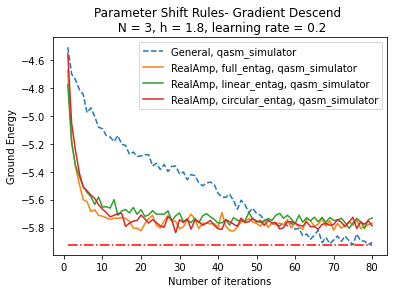

CPU times: user 5min 24s, sys: 2.11 s, total: 5min 26s
Wall time: 5min 26s


In [295]:
%%time
numiters = 80
learning_rate = 0.2
N = 3
h = 1.8

f1 = PSR_Gradient_Descend(ising_costfun, [0,0,0,0,0,0], (N,h,'RealAmp_full'), learning_rate, numiters)
f2 = PSR_Gradient_Descend(ising_costfun, [0,0,0,0,0,0], (N,h,'RealAmp_linear'), learning_rate, numiters)
f3 = PSR_Gradient_Descend(ising_costfun, [0,0,0,0,0,0], (N,h,'RealAmp_circular'), learning_rate, numiters)
f4 = PSR_Gradient_Descend(ising_costfun, [0,0,0,0,0,0,0], (N,h, 'General'), learning_rate, numiters)

plt.plot(np.arange(1, numiters+1), f4.values, '--', label = 'General, qasm_simulator')
plt.plot(np.arange(1, numiters+1), [get_exact_E_value(N,h)] * numiters, '-.', color = 'r' )
plt.plot(np.arange(1, numiters+1), f1.values, '-', label = 'RealAmp, full_entag, qasm_simulator')
plt.plot(np.arange(1, numiters+1), f2.values, '-', label = 'RealAmp, linear_entag, qasm_simulator')
plt.plot(np.arange(1, numiters+1), f3.values, '-', label = 'RealAmp, circular_entag, qasm_simulator')

plt.title('Parameter Shift Rules- Gradient Descend \n N = {}, h = {}, learning rate = {}'.format(N,h,learning_rate)  )
plt.ylabel('Ground Energy')
plt.xlabel('Number of iterations')
plt.legend()
plt.show()

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


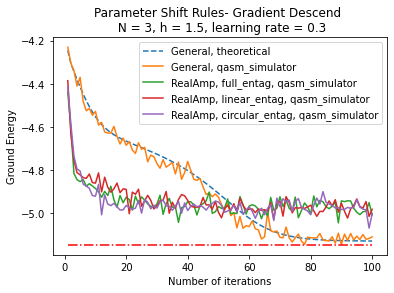

CPU times: user 6min 49s, sys: 2.69 s, total: 6min 52s
Wall time: 6min 52s


In [299]:
%%time
numiters = 100
learning_rate = 0.3
N = 3
h = 1.5
f5 = PSR_Gradient_Descend(theor_ising_costfun, [0,0,0,0,0,0,0], (N, h), learning_rate, numiters)
f1 = PSR_Gradient_Descend(ising_costfun, [0,0,0,0,0,0], (N,h,'RealAmp_full'), learning_rate, numiters)
f2 = PSR_Gradient_Descend(ising_costfun, [0,0,0,0,0,0], (N,h,'RealAmp_linear'), learning_rate, numiters)
f3 = PSR_Gradient_Descend(ising_costfun, [0,0,0,0,0,0], (N,h,'RealAmp_circular'), learning_rate, numiters)
f4 = PSR_Gradient_Descend(ising_costfun, [0,0,0,0,0,0,0], (N,h, 'General'), learning_rate, numiters)


plt.plot(np.arange(1, numiters+1), f5.values, '--', label = 'General, theoretical')
plt.plot(np.arange(1, numiters+1), f4.values, '-', label = 'General, qasm_simulator')
plt.plot(np.arange(1, numiters+1), [get_exact_E_value(N,h)] * numiters, '-.', color = 'r' )
plt.plot(np.arange(1, numiters+1), f1.values, '-', label = 'RealAmp, full_entag, qasm_simulator')
plt.plot(np.arange(1, numiters+1), f2.values, '-', label = 'RealAmp, linear_entag, qasm_simulator')
plt.plot(np.arange(1, numiters+1), f3.values, '-', label = 'RealAmp, circular_entag, qasm_simulator')

plt.title('Parameter Shift Rules- Gradient Descend \n N = {}, h = {}, learning rate = {}'.format(N,h,learning_rate)  )
plt.ylabel('Ground Energy')
plt.xlabel('Number of iterations')
plt.legend()
plt.show()

In [303]:
f = []
numiters = 100
for i in range(numiters):
    sol = minimize(theor_ising_costfun, [0,0,0], (2,2), 'COBYLA', options = {'maxiter': i})
    f.append(sol.fun)
plt.plot(np.ar)

AttributeError: module 'numpy' has no attribute 'ar'